In [2]:
import cv2
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras

In [3]:
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [4]:
def face_extractor(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    
    if faces is():
        return None
  
    for(x, y, w, h) in faces:
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face

<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-4-3ccc34bdac79>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is():


In [5]:
print('sd')

sd


In [6]:
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(0)

In [7]:
if not cap.isOpened():
    print("Error: Could not open file: %s" % (0))
    pass
count = 0
while True:
    ret, frame = cap.read()
    
    if face_extractor(frame) is not None:
        count+=1
        face = cv2.resize(face_extractor(frame), (200, 200))
        print(face.shape)
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        file_name_path = '/Users/app/Documents/Machine_Learning/opencv/faces/user'+str(count)+'.jpg'
        cv2.imwrite(file_name_path, face)

        cv2.putText(face, str(count), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)
        cv2.imshow('Face Cropper', face)
    else:
        print('Face not Found')
        pass
    
    if cv2.waitKey(1)==13 or count==100: # enter
        break

cap.release()
cv2.destroyAllWindows()
print('Collecting samples completed!!!')

Face not Found
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
Face not Found
Face not Found
Face not Found
Face not Found
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
Face not Found
(200, 200, 3)
Face not Found
(200, 200, 3)
(200, 200, 3)
Face not Found
(200, 200, 3)
Face not Found
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
Face not Found
(200, 200, 3)
(200, 200, 3)
Face not Found
(200, 200, 3)
Face not Found
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
Face not Found
(200, 200, 3)
(200, 2

In [12]:
cap.release()

In [4]:
import pathlib
data_path = pathlib.Path('faces/')
data_path

PosixPath('faces')

In [24]:
img_paths = list(data_path.glob('user*'))

In [26]:
# np.sort(img_paths)
img_paths[0]

PosixPath('faces/user88.jpg')

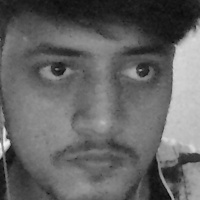

In [16]:
from PIL import Image
Image.open(img_paths[0])

In [27]:
str(img_paths[0])

'faces/user88.jpg'

In [98]:
x = []
y = []
for path in img_paths:
    img = cv2.imread(str(path))
    x.append(img)
    number = ''
    for word in str(path):
        if word.isdigit():
            number+=word
    y.append(int(number)%2)

In [99]:
x = np.array(x)
y = np.array(y)
x = x/255

In [134]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
#     keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
#     keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(2, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)


In [135]:
model.fit(x, y, epochs=5)

Epoch 1/5
4/4 [==============================] - 1s 158ms/step - loss: 5.5833 - accuracy: 0.5088
Epoch 2/5
4/4 [==============================] - 1s 146ms/step - loss: 1.9838 - accuracy: 0.3853
Epoch 3/5
4/4 [==============================] - 1s 143ms/step - loss: 1.4476 - accuracy: 0.4906
Epoch 4/5
4/4 [==============================] - 1s 142ms/step - loss: 1.0194 - accuracy: 0.5255
Epoch 5/5
4/4 [==============================] - 1s 148ms/step - loss: 0.7509 - accuracy: 0.4762


In [140]:
model.evaluate(x, y)

4/4 [==============================] - 1s 52ms/step - loss: 0.7920 - accuracy: 0.5000


[0.7919512391090393, 0.5]

In [138]:
y_pred = model.predict(x)

In [139]:
y_pred[1]

array([0.11069689, 0.88930315], dtype=float32)